In [1]:
import os
import sys
from glob import glob
from typing import List

import numpy as np

import torch
import torch.nn as nn
from torchvision import transforms

from PIL import Image

In [2]:
from dataset import HymenopteraDataBuilder
from utils import ClassIndexLookUp

VGG16_SIZE = (256, 256)
VGG16_MEAN = (0.485, 0.456, 0.406)
VGG16_STD = (0.229, 0.224, 0.225)

BATCH_SIZE = 2
data_dir = './data'

transform_train = transforms.Compose([
    transforms.Resize(size=VGG16_SIZE),
    transforms.ToTensor(),
    transforms.Normalize(mean=VGG16_MEAN, std=VGG16_STD)
])

transform_val = transform_train

transform_dict = {
    'train': transform_train,
    'val': transform_val,
}

dataloader_builder = HymenopteraDataBuilder(data_dir=data_dir, transform_dict=transform_dict, batch_size=BATCH_SIZE)
dataloader_dict = dataloader_builder.get_dataloader()

In [3]:
next(iter(dataloader_dict['test']))

[tensor([[[[-0.6794, -0.6109, -0.5424,  ...,  0.0569,  0.2282, -0.2513],
           [-0.2856, -0.3198, -0.3027,  ..., -0.1828, -0.0116, -0.1828],
           [ 0.3309,  0.2967,  0.1939,  ..., -0.0287, -0.0116, -0.1314],
           ...,
           [ 0.6734,  0.8104,  0.9646,  ...,  0.0056,  0.0056,  0.5022],
           [ 0.8104,  1.0159,  0.9988,  ...,  0.5364,  0.5022,  0.3652],
           [ 0.8104,  0.7762,  0.8618,  ...,  0.4851,  0.4508,  0.4166]],
 
          [[-0.8627, -0.7927, -0.6877,  ...,  0.0826,  0.2752, -0.2325],
           [-0.4251, -0.4426, -0.4426,  ..., -0.1625,  0.0301, -0.1800],
           [ 0.2402,  0.2227,  0.1001,  ...,  0.0301,  0.0476, -0.1275],
           ...,
           [ 0.7304,  0.8704,  1.0455,  ...,  0.1352,  0.1176,  0.5903],
           [ 0.8704,  1.0805,  1.0980,  ...,  0.6604,  0.6254,  0.4503],
           [ 0.8704,  0.8529,  0.9930,  ...,  0.6254,  0.5728,  0.5028]],
 
          [[-0.7761, -0.7936, -0.8110,  ...,  0.1999,  0.3742, -0.1835],
           [-

In [4]:
print(dataloader_dict['train'].__len__(), dataloader_dict['val'].__len__(), dataloader_dict['test'].__len__())

122 38 38


Text(0.5, 1.0, 'tench')

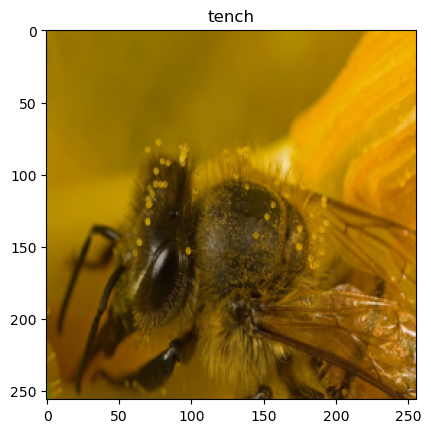

In [ ]:
import matplotlib.pyplot as plt

index_to_label = ClassIndexLookUp(data_dir)

mean_channels = np.array(VGG16_MEAN).reshape(1,1,3)
std_channels = np.array(VGG16_STD).reshape(1,1,3)

data_1 = next(iter(dataloader_dict['train'])) 
img_1 = data_1[0][1].numpy().transpose(1,2,0) # [img | class][batch]
label_1 = data_1[1][0].item()

retrieved_img_1 = ((img_1 * std_channels + mean_channels) * 255).astype(np.uint8)

plt.imshow(retrieved_img_1)
plt.title(index_to_label(label_1)) # Not transfer learned yet